# 3. Análise de subsídios ofertados às famílias acolhedoras

O objetivo da análise é verificar se há e quais são os tipos de subsídio oferecido às famílias que estão acolhendo no momento.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [4]:
df_dados_gerais.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,coordenador_saf_situacao,capaci_equipe_tec_saf_presencial,capaci_equipe_tec_saf_ead,capaci_equipe_tec_saf_nao_faz,capaci_equipe_tec_saf_presencial_qtd,capaci_equipe_tec_saf_ead_qtd,IBGE7,nome_da_uf,Regiao,Município
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Não,Não,Não,NaN,NaN,1100114,Rondonia,Região Norte,Jaru
1,110012,"1,10012E+12",JI-PARANA,RO,02/01/2022,-10.876.486.067.028.500,-619.596.290.588.379,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,3.0,4.0,1100122,Rondonia,Região Norte,Ji-Paraná
2,110020,"1,1002E+12",PORTO VELHO,RO,13/12/2017,-915.359.258.390.788,-643.068.141.967.022,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Sim,Não,5.0,5.0,1100205,Rondonia,Região Norte,Porto Velho
3,120040,"1,2004E+12",RIO BRANCO,AC,17/05/2013,-9.948.852.227.687.540,-6.785.414.814.949.030,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1200401,Acre,Região Norte,Rio Branco
4,130170,"1,3017E+12",HUMAITA,AM,28/12/2020,-7.519.639.784.496.380,-63.031.353.950.500.400,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,1301704,Amazonas,Região Norte,Humaitá


In [5]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'municipio',
 'uf',
 'data_implementacao_unidade',
 'Latitude',
 'Longitude',
 'natureza_unidade',
 'custo_manutencao',
 'servico_regulamentado',
 'ano_implementacao_servico',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'subsidio_outros_quais',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_te

## 3.1. Variável de subsídio mensal repassado às famílias acolhedoras

Alguns SFA ofertam subsídio mensal em reais às famílias acolhedoras. A variável 'subsidio_valor_mensal' refere-se ao valor mensal do subsídio financeiro repassado à cada família acolhedora por criança/adolescente.

In [6]:
df_dados_gerais['subsidio_valor_mensal'].apply(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [7]:
# Transformar os dados em números
df_dados_gerais['subsidio_valor_mensal'] = pd.to_numeric(df_dados_gerais['subsidio_valor_mensal'], errors='coerce')

In [8]:
df_dados_gerais.shape

(620, 174)

In [9]:
df_dados_gerais['subsidio_valor_mensal'].isna().sum()

64

In [10]:
df_nulos_subsidio = df_dados_gerais[df_dados_gerais['subsidio_valor_mensal'].isna()]

In [11]:
df_nulos_subsidio.head()

,IBGE,NU_IDENTIFICADOR,municipio,uf,data_implementacao_unidade,Latitude,Longitude,natureza_unidade,custo_manutencao,servico_regulamentado,...,coordenador_saf_situacao,capaci_equipe_tec_saf_presencial,capaci_equipe_tec_saf_ead,capaci_equipe_tec_saf_nao_faz,capaci_equipe_tec_saf_presencial_qtd,capaci_equipe_tec_saf_ead_qtd,IBGE7,nome_da_uf,Regiao,Município
0,110011,"1,10011E+12",JARU,RO,29/03/2023,-10.439,-62.466,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Não,Não,Não,NaN,NaN,1100114,Rondonia,Região Norte,Jaru
8,130340,"1,3034E+12",PARINTINS,AM,01/10/2017,-26.331.842.224.955.400,-56.737.711.429.595.900,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Sim,Não,NaN,4.0,1303403,Amazonas,Região Norte,Parintins
23,160010,"1,6001E+12",AMAPA,AP,30/10/2023,20.520.089.817.919.700,-50.792.090.892.791.700,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Sim,Não,Não,3.0,NaN,1600105,Amapá,Região Norte,Amapá
36,210235,"2,10235E+12",BURITIRANA,MA,01/01/2017,-551.795.185.375.319,-470.613.815.941.458,Governamental,NaN,"Sim, por lei",...,Exerce exclusivamente a função de coordenador(...,Não,Não,Sim,NaN,NaN,2102358,Maranhão,Região Nordeste,Buritirana
37,210330,"2,1033E+12",CODO,MA,21/07/2017,-4.462.538.556.340.480,-4.388.851.014.038.660,Governamental,NaN,"Sim, por lei",...,Exerce concomitantemente a função de coordenad...,Sim,Não,Não,2.0,NaN,2103307,Maranhão,Região Nordeste,Codó


In [12]:
df_nulos_subsidio['uf'].value_counts()

PR    14
SP    11
SC     9
RS     6
MA     5
BA     4
MG     4
MS     2
MT     2
RO     1
AM     1
AP     1
RN     1
PB     1
RJ     1
GO     1
Name: uf, dtype: int64

In [13]:
# Como há apenas 64 nulos em um universo de 620 linhas, atribuí 0 aos valores nulos, supondo que não há subsídio mensal - ainda que a resposta pode ter sido Não Sei
df_dados_gerais['subsidio_valor_mensal'].fillna(0, inplace=True)

In [14]:
# Verificar os outliers
df_dados_gerais['subsidio_valor_mensal'].describe()

count      620.000000
mean      1283.346774
std       3370.194269
min          0.000000
25%        688.000000
50%       1320.000000
75%       1320.000000
max      79200.000000
Name: subsidio_valor_mensal, dtype: float64

In [15]:
# Calcular os quartis e o intervalo interquartil (IQR)
q1 = df_dados_gerais['subsidio_valor_mensal'].quantile(0.25)
q3 = df_dados_gerais['subsidio_valor_mensal'].quantile(0.75)
iqr = q3 - q1

# Determinar o limite superior para outliers
limite_superior = q3 + 1.5 * iqr

# Filtrar os outliers
outliers = df_dados_gerais[df_dados_gerais['subsidio_valor_mensal'] > limite_superior]

# Exibir o limite superior para referência
print(f"Limite superior para outliers: {limite_superior}")

Limite superior para outliers: 2268.0


In [16]:
# Atenção às observações acima de 13 mil, assim, melhor retirá-las do que inferir os valores, uma vez que são apenas 3 linhas
outliers[['municipio', 'uf', 'subsidio_valor_mensal']].sort_values(by='subsidio_valor_mensal', ascending=False)

,municipio,uf,subsidio_valor_mensal
219,VILA VELHA,ES,79200.0
381,MARIOPOLIS,PR,26400.0
469,FLORIANOPOLIS,SC,13000.0
218,PEDRO CANARIO,ES,2640.0
272,PAULINIA,SP,2640.0
499,NOVO HORIZONTE,SC,2640.0
505,PERITIBA,SC,2640.0
509,POMERODE,SC,2640.0
325,CAFELANDIA,PR,2369.0


In [17]:
# Filtrar para manter apenas valores iguais ou abaixo de 13000
df_sem_outliers = df_dados_gerais[df_dados_gerais['subsidio_valor_mensal'] < 13000]

# Verificar quantas linhas foram removidas
removidas = len(df_dados_gerais) - len(df_sem_outliers)
print(f"Total de outliers removidos: {removidas}")

Total de outliers removidos: 3


In [18]:
# Calcula a média por UF
media_por_uf_sem_outliers = df_sem_outliers.groupby(['uf', 'Regiao'])['subsidio_valor_mensal'].mean().reset_index()
media_por_uf_sem_outliers.sort_values(by='subsidio_valor_mensal', ascending=False)

,uf,Regiao,subsidio_valor_mensal
21,SC,Região Sul,1334.490385
0,AC,Região Norte,1320.000000
6,ES,Região Sudeste,1320.000000
16,PR,Região Sul,1195.407692
10,MS,Região Centro Oeste,1170.869565
14,PE,Região Nordeste,1153.875000
22,SP,Região Sudeste,1122.438596
13,PB,Região Nordeste,1089.285714
12,PA,Região Norte,1085.833333
23,TO,Região Norte,1072.500000


In [19]:
# Define cores para cada região
cores_regiao = {
    'Região Norte': 'blue', 'Região Nordeste': 'green', 'Região Centro Oeste': 'orange',
    'Região Sudeste': 'red', 'Região Sul': 'purple'
}

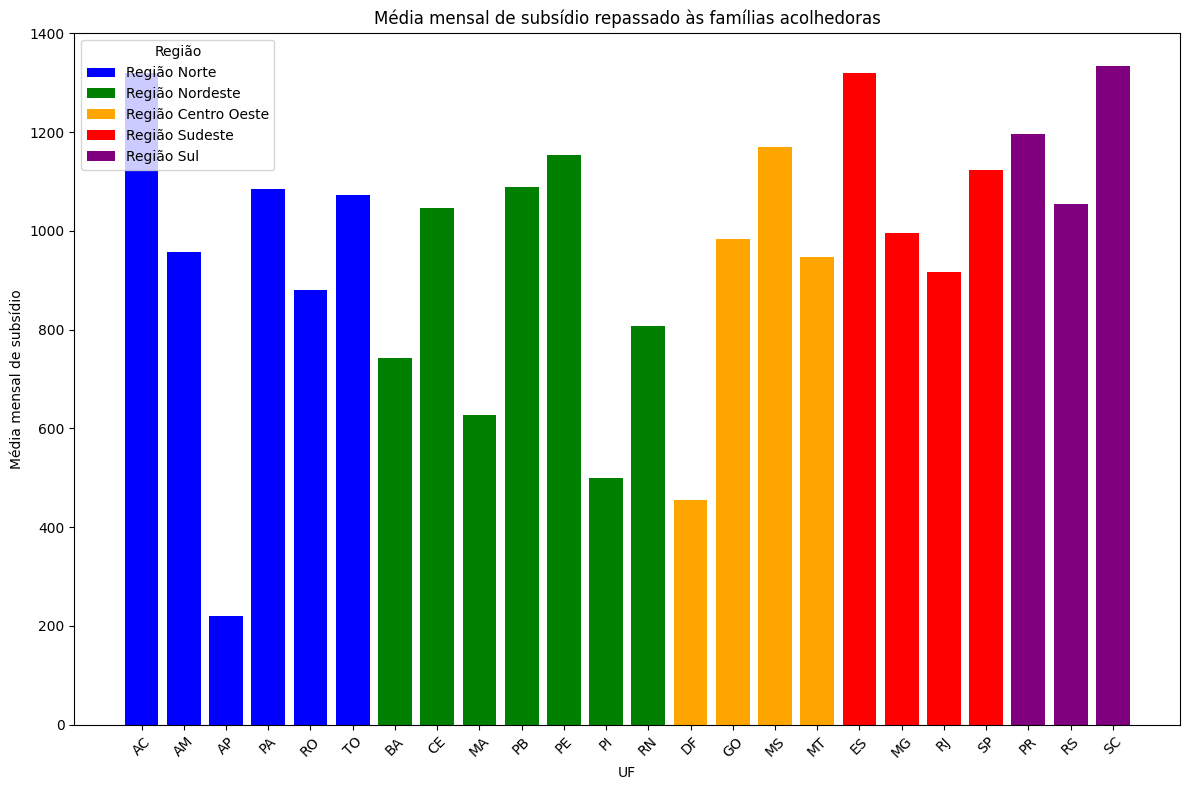

In [20]:
# Cria o gráfico de barras
plt.figure(figsize=(12, 8))
for regiao, cor in cores_regiao.items():
    subset = media_por_uf_sem_outliers[media_por_uf_sem_outliers['Regiao'] == regiao]
    plt.bar(subset['uf'], subset['subsidio_valor_mensal'], label=regiao, color=cor)

# Configurações do gráfico
plt.title('Média mensal de subsídio repassado às famílias acolhedoras')
plt.xlabel('UF')
plt.ylabel('Média mensal de subsídio')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

## 3.2. Demais variáveis de apoio/isenção destinado às famílias acolhedoras

- 'subsidio_itens_manutencao': são disponibilizados itens para a manutenção da criança/adolescente acolhida (p.ex: fraldas, vestuário,
alimentação, medicamentos, material escolar, dentre outros)
- 'subsidio_mobiliario_transporte': são disponibilizados itens de mobiliário e transporte para uso da criança/adolescente acolhida (p.ex:
berço, carrinho de bebê, etc.)
- 'subsidio_isencao_imposto_taxa': há isenção de impostos ou taxas públicas (p.ex: IPTU, etc)
- 'subsidio_outros': há outros tipos de apoio não financeiro ou isenção
- 'subsidio_nao_repassa': não há outro tipo de apoio não financeiro ou isenção
- 'subsidio_outros_quais': quais são os outros tipos de apoio não financeiro ou isenção

In [21]:
df_dados_gerais['subsidio_itens_manutencao'].apply(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [22]:
df_dados_gerais['subsidio_itens_manutencao'].value_counts()

Sim    156
Não     71
Name: subsidio_itens_manutencao, dtype: int64

In [23]:
df_dados_gerais['subsidio_mobiliario_transporte'].value_counts()

Não    141
Sim     86
Name: subsidio_mobiliario_transporte, dtype: int64

In [24]:
df_dados_gerais['subsidio_isencao_imposto_taxa'].value_counts()

Não    176
Sim     51
Name: subsidio_isencao_imposto_taxa, dtype: int64

In [25]:
df_dados_gerais['subsidio_outros'].value_counts()

Não    203
Sim     24
Name: subsidio_outros, dtype: int64

In [26]:
df_dados_gerais['subsidio_nao_repassa'].value_counts()

Sim    393
Não    227
Name: subsidio_nao_repassa, dtype: int64

In [27]:
colunas_subsidios = ['subsidio_itens_manutencao', 'subsidio_mobiliario_transporte', 'subsidio_isencao_imposto_taxa', 'subsidio_outros', 'subsidio_nao_repassa']

In [28]:
df_dados_gerais[colunas_subsidios].isna().sum()

subsidio_itens_manutencao         393
subsidio_mobiliario_transporte    393
subsidio_isencao_imposto_taxa     393
subsidio_outros                   393
subsidio_nao_repassa                0
dtype: int64

In [29]:
# Como há valores nulos nas variáveis e, como não há informação se é Não, a melhor forma é filtrar as colunas para contar apenas Sim e Não, ignorando os NaNs
freq_df = df_dados_gerais[colunas_subsidios].apply(lambda x: x.value_counts(dropna=True)).T

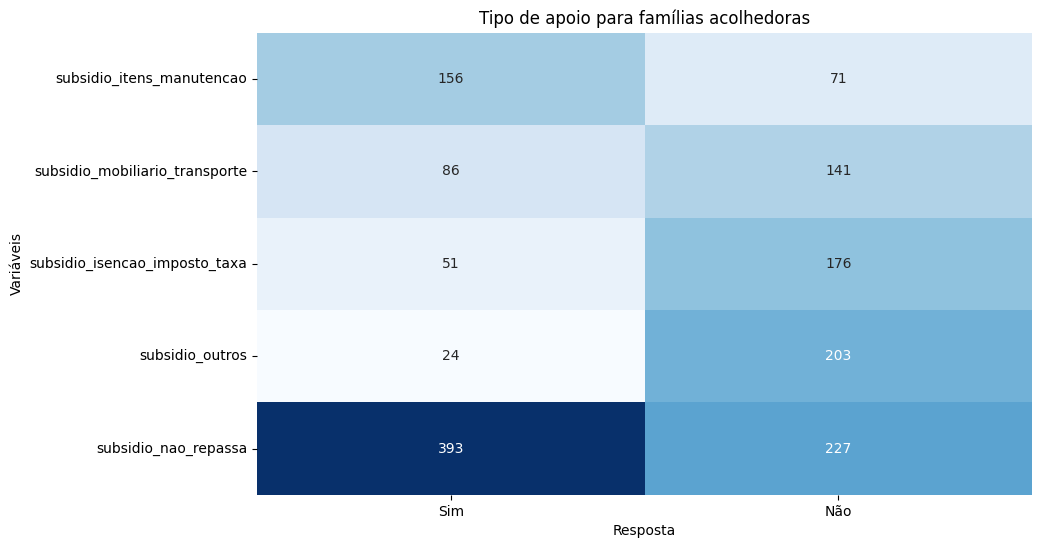

In [30]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(freq_df[['Sim', 'Não']], annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Tipo de apoio para famílias acolhedoras')
plt.xlabel('Resposta')
plt.ylabel('Variáveis')
plt.show()

In [31]:
df_dados_gerais['subsidio_outros_quais'].value_counts()

Incentivos através de descontos em bens e serviços em empresas privadas para famílias acolhedoras    1
alimentação, quite higiene                                                                           1
AUXILIO ALIMENTAR                                                                                    1
1/2 SALÁRIO MÍNIMO PARA FAMILIAS ACOLHEDORAS                                                         1
Descanso anual sem perda do subsidio                                                                 1
As famílias recebem incentivo de meio saláriofixo mensal, independente de ter criança em acolhime    1
Bolsa-Auxílio                                                                                        1
No caso de criança PcD, 50% a mais do subsídio,                                                      1
cesta basica                                                                                         1
itens para atendimento inicial até o repasse do subsidio                 